# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [610]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [611]:
from sklearn.datasets import load_boston
import pandas as pd


boston = load_boston()

In [612]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [613]:
boston.data.shape

(506, 13)

In [614]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [615]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [616]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [617]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [618]:
print(boston.target.shape)

(506,)


In [619]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [620]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

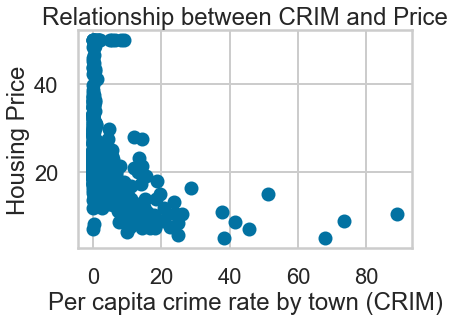

In [621]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

#your turn: describe relationship

There is a  negative relation between the Crime rate and the Housing price, it is pretty obvious that , crime rate in t he area will have an effect on the housing price ,ie crime rate can also be one of the factors influences the house price.

Text(0.5, 1.0, 'Relationship between number of ROOMS and Price')

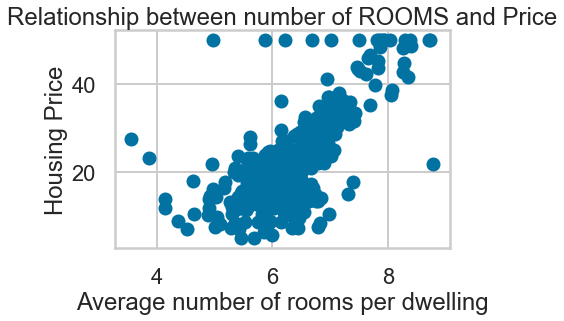

In [622]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between number of ROOMS and Price")

There is a strong positive correlation between price of the house and number of rooms. This is expected as larger houses with  more number of rooms are expected to be more expensive.

There are a  few outliers in this plot. This may be due to other factors such as neighborhood, school ratings ,communications etc can affect the prices up or down.

Text(0.5, 1.0, 'Relationship between pupil teacher ratio and Price')

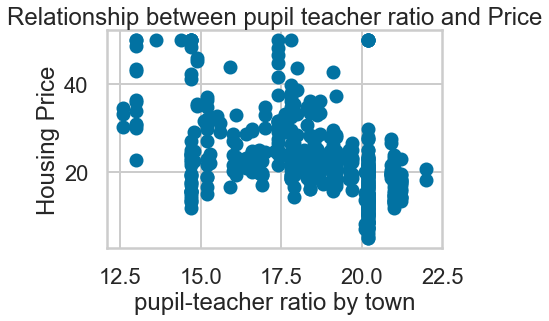

In [623]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between pupil teacher ratio and Price")

There seems to be a weak negative relation between pupil teacher ratio and the price, but we cant conclude that the area with schools with high pupil to teacher ration will have low prices,

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

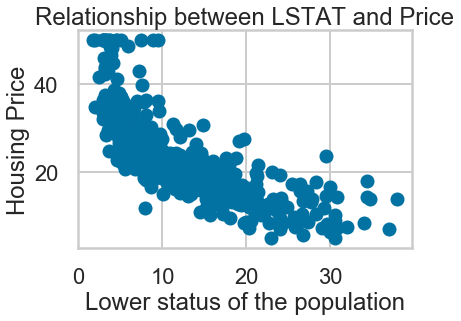

In [624]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("Lower status of the population")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

There is a strong negative correlation between Lower status population and the housing prices.

Text(0.5, 1.0, 'Relationship between property tax and Price')

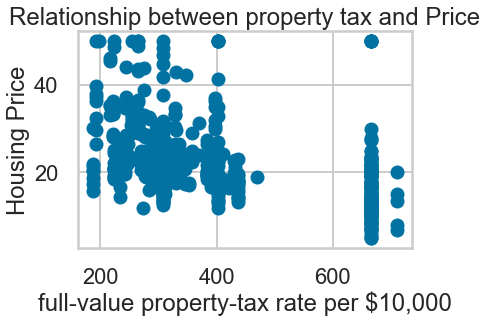

In [625]:
# your turn: Scatter plot between NOX and PRICE
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("full-value property-tax rate per $10,000")
plt.ylabel("Housing Price")
plt.title("Relationship between property tax and Price")

There is a medium negative correlation between tax and price. Areas with lower taxes will attract more residents and hence increasing  the house prices.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


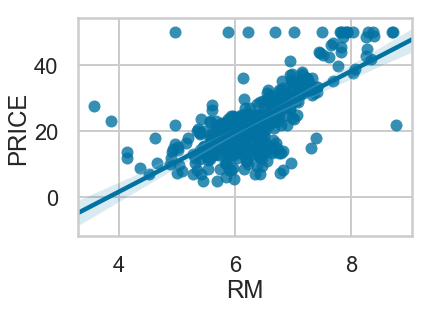

In [626]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


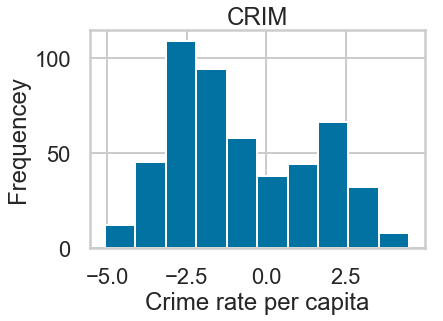

In [627]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

In [628]:
bos.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [629]:
np.log(bos.CRIM).describe()

count    506.000000
mean      -0.780436
std        2.162050
min       -5.064036
25%       -2.500488
50%       -1.360641
75%        1.302119
max        4.488369
Name: CRIM, dtype: float64

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

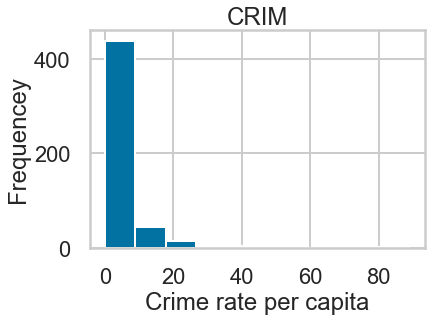

In [630]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Taking the log tranforms the data to a new scale.

When we look at the statistics of the CRIM data , we can see that median= 0.25, mean = 3.61 and the max value being 88.97.
When we plot without log transformation , all the lower values will be supressed making these differences more difficult to view.

The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable


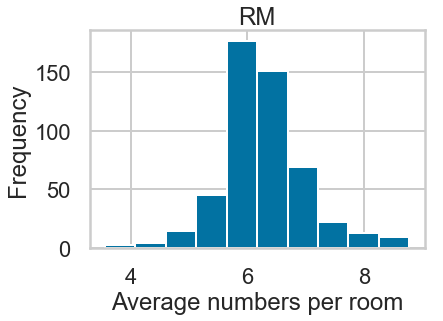

In [631]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average numbers per room")
plt.ylabel("Frequency")
plt.show()

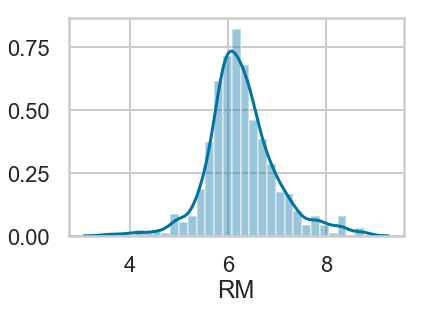

In [632]:
sns.distplot(bos['RM'])

In [633]:
bos.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

The number of rooms in a house seems to be normally distributed in the Boston Housing dataset with the average number of rooms being close to 6.

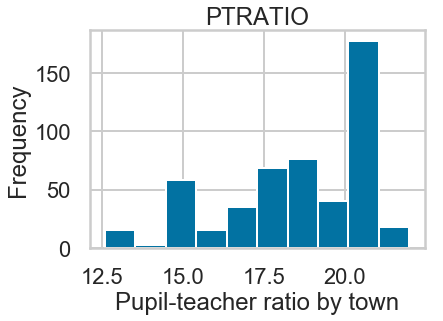

In [634]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequency")
plt.show()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


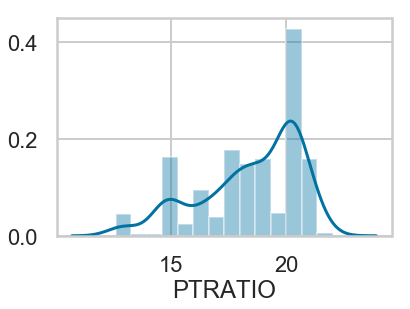

In [635]:
print(bos.PTRATIO.describe())
sns.distplot(bos['PTRATIO'])


The PTRATIO is not normal distribution and the most common  pupil teacher ratio is about 20. 

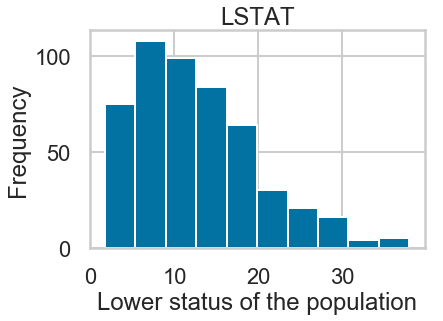

In [636]:
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("Lower status of the population")
plt.ylabel("Frequency")
plt.show()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64


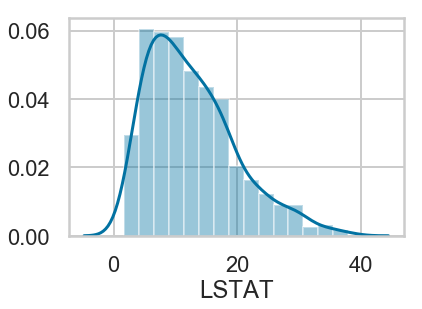

In [637]:
print(bos.LSTAT.describe())
sns.distplot(bos['LSTAT'])

LSTAT looks like the distribution is  skewed to left

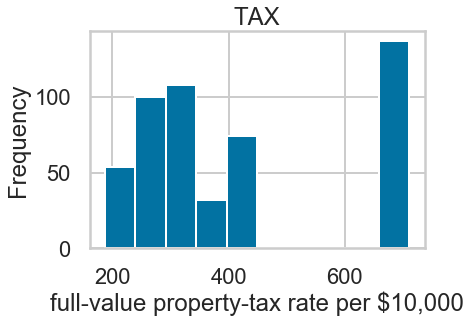

In [638]:
plt.hist(bos.TAX)
plt.title("TAX")
plt.xlabel("full-value property-tax rate per $10,000")
plt.ylabel("Frequency")
plt.show()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64


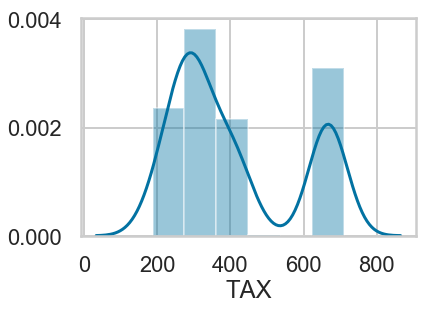

In [639]:
print(bos.TAX.describe())
sns.distplot(bos['TAX'])

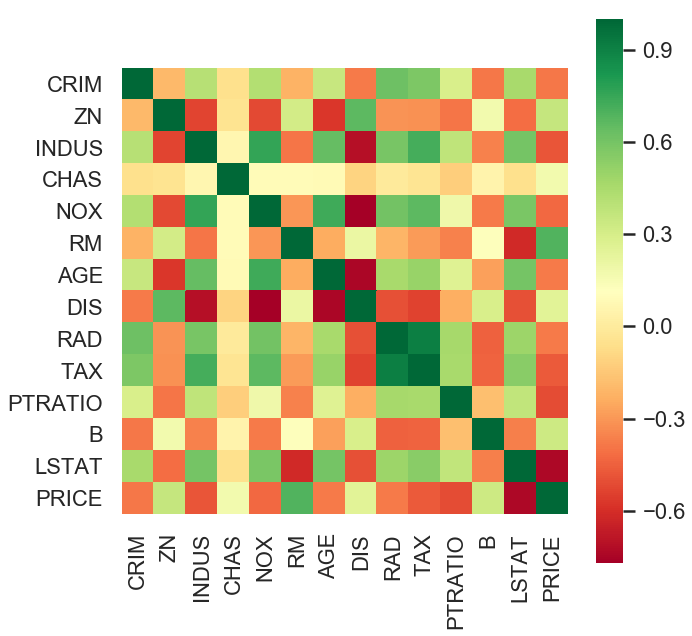

In [640]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bos.corr(), square=True, cmap='RdYlGn',ax=ax)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [641]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [642]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
m.df_model, m.df_resid 

(1.0, 504.0)

In [643]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 04 May 2019   Prob (F-statistic):           2.49e-74
Time:                        00:08:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

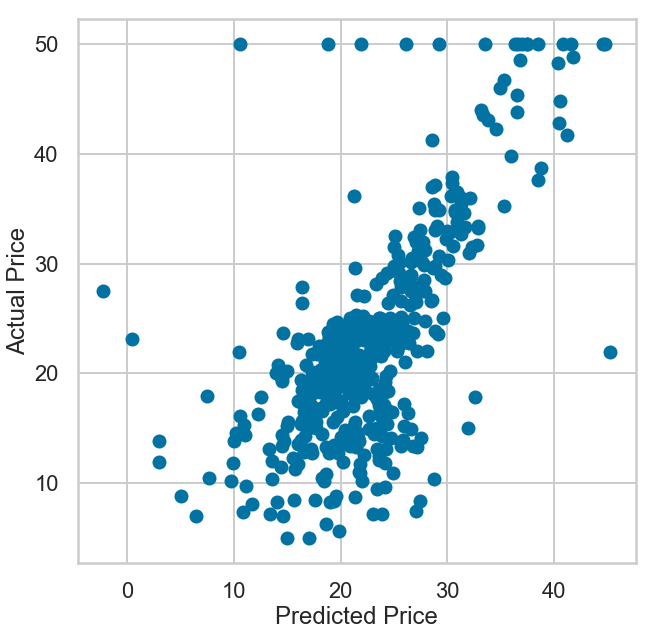

In [644]:
# your turn,,
plt.figure(figsize=(10,10))
plt.scatter(m.fittedvalues, bos.PRICE)
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.show()

Plot is showing  a linear relation, but there are a few outliers , notably the negative predicted price one.

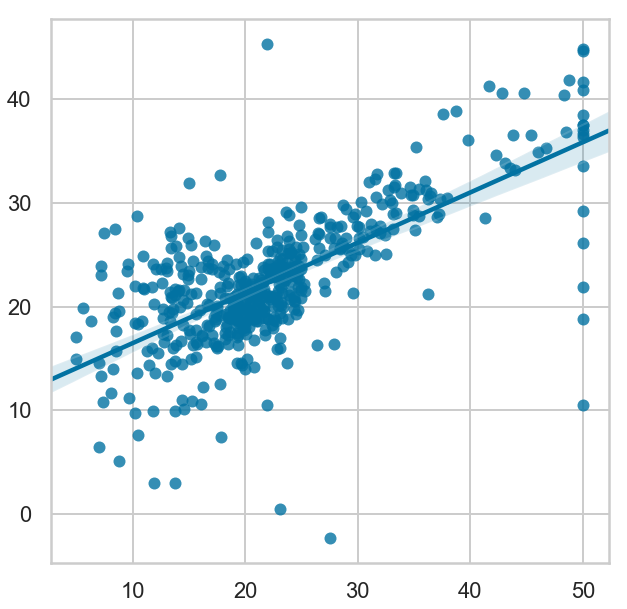

In [645]:
plt.figure(figsize=(10,10))

sns.regplot(y=m.fittedvalues.values, x=bos.PRICE.values, data=bos, fit_reg = True)


### Fitting Linear Regression using `sklearn`


In [646]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [647]:
# Look inside lm object
# lm.<tab>


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [648]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)
print(lm.coef_)
print(lm.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509009


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is  enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [649]:
# your turn
# No intercept
lm_1 = LinearRegression(fit_intercept=False)
lm_1.fit(X, bos.PRICE)
print(lm_1.coef_)
print(lm_1.intercept_)

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]
0.0


# You should never remove the intercept when a predictor variable is continuous.

When you remove an intercept from a regression model, you’re setting it equal to 0 rather than estimating it from the data.

Dropping the intercept in a regression model forces the regression line to go through the origin–the y intercept must be 0.

The problem with dropping the intercept is ,if the slope is steeper just because you’re forcing the line through the origin, not because it fits the data better.  If the intercept really should be something else, you’re creating that steepness artificially.  A more significant model isn’t better if it’s inaccurate

https://thestatsgeek.com/2013/08/07/assumptions-for-linear-regression

In order to use OLS regression, the residuals must:
1. Be independent
2. Have constant variance
3. Be normally distributed

A common misconception about linear regression is that it assumes that the outcome Y is normally distributed. Actually, linear regression assumes normality for the residual errors , which represent variation in Y which is not explained by the predictors(X) . It may be the case that marginally (i.e. ignoring any predictors) Y is not normal, but after removing the effects of the predictors, the remaining variability, which is precisely what the residuals represent, are normal, or are more approximately normal.

Inferential procedures for linear regression are typically based on a normality assumption for the residuals. As sample sizes increase, the normality assumption for the residuals is not needed. More precisely, if we consider repeated sampling from our population, for large sample sizes, the distribution (across repeated samples) of the ordinary least squares estimates of the regression coefficients follow a normal distribution. As a consequence, for moderate to large sample sizes, non-normality of residuals should not adversely affect the usual inferential procedures. This result is a consequence of an extremely important result in statistics, known as the central limit theorem.

A further assumption made by linear regression is that the residuals have constant variance. That is, their variance does not change across different levels of the predictors. In contrast to the normality assumption, if the residuals do not satisfy the constant variance assumption, standard errors and confidence intervals (based on standard formulae) will be adversely affected, irrespective of whether the sample size is large or not. However even in this case, the ordinary least squares estimators are unbiased.


False. Y does not need to be normally distributed to use linear regression.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [650]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509009


In [651]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [652]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [653]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [654]:
# your turn
bos['PRICE_PREDICT']  = lm.predict(X)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRICE_PREDICT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524


count    506.000000
mean      22.532806
std        7.915083
min       -4.281311
25%       17.445740
50%       22.118653
75%       27.410022
max       44.673083
Name: PRICE_PREDICT, dtype: float64


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


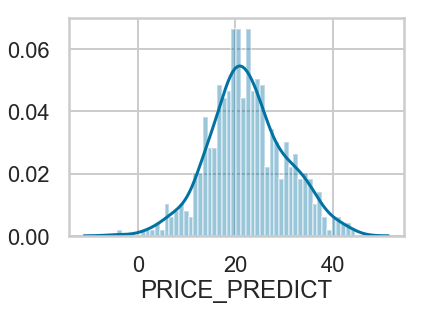

In [655]:
print(bos['PRICE_PREDICT'].describe())
sns.distplot(bos['PRICE_PREDICT'], bins=50)

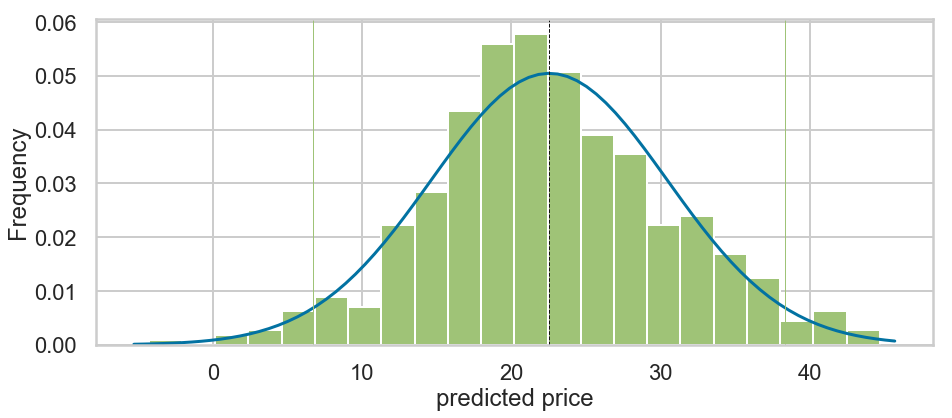

In [656]:
mean_price = np.mean(bos['PRICE_PREDICT'])
std_price = np.std(bos['PRICE_PREDICT'])

plt.figure(figsize=(15,6))


size = np.linspace(bos['PRICE_PREDICT'].min()-1, bos['PRICE_PREDICT'].max()+1,80)
pdf = stats.norm.pdf(size, mean_price, std_price)
_= plt.plot(size, pdf)

n_bins = int(np.sqrt(len(bos['PRICE_PREDICT'])))
_ = plt.hist(bos['PRICE_PREDICT'], bins= n_bins,density=True)


_ = plt.axvline(mean_price, color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_price + 2*std_price, color='g', linestyle='solid', linewidth=1)
_ = plt.axvline(mean_price - 2*std_price, color='g', linestyle='solid', linewidth=1)
                
_ = plt.xlabel('predicted price')
_ = plt.ylabel('Frequency')
#_ = plt.legend(['Normal PDF','predicted price Histogram','mean','std','std'],loc='upper left')

In [657]:
from scipy import stats
stats.describe(lm.predict(X))

DescribeResult(nobs=506, minmax=(-4.281310709184865, 44.67308338731307), mean=22.53280632411068, variance=62.64853631101922, skewness=0.11071842432057187, kurtosis=0.10343116979613276)

The predicted prices seems like almost normally distributed with slight skew(0.11), mean around 22.53 and variance of 62.64. There are some outliers where the price is negative, which is not possible.Reasons can be like the collinearity between the predictors, oultiers in the independent data.

In [658]:
#_= plt.hist(bos.PRICE_PREDICT, bins=50, alpha=.5)

#_= plt.hist(bos.PRICE, bins=50, alpha=.5)

#sns.distplot(bos['PRICE_PREDICT'], bins=50)
#sns.distplot(bos['PRICE'], bins=50)

In [659]:
m = ols('PRICE ~ PRICE_PREDICT',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1439.
Date:                Sat, 04 May 2019   Prob (F-statistic):          8.28e-150
Time:                        00:08:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3002.
Df Residuals:                     504   BIC:                             3010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.193e-14      0.629  -3.48e-14

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


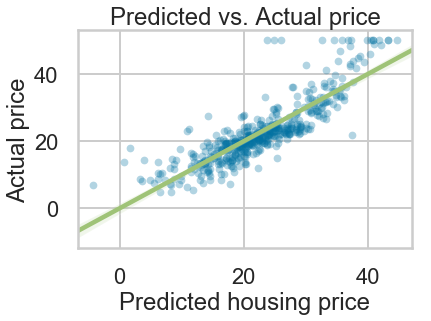

In [660]:
# reg plot: Predicted vs. Actual Median Home Value

sns.regplot(x='PRICE_PREDICT', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':60},line_kws={'color': 'C1'})

_ = plt.xlabel('Predicted housing price')
_ = plt.ylabel('Actual price')
_ = plt.title('Predicted vs. Actual price');

# statsmodels  Vs  scikit-learn

scikit-learn provides a better picture of all of the data points, while statsmodels provides many precise measures in a single method call.

The main benefit of statsmodels is the other statistics it provides.
Statsmodels helps us determine which of our variables are statistically significant through the p-values.         
If our p-value is <.05, then that variable is statistically significant.

We can get coefficients  pretty easily from SKLearn.
I would use SKLearn to build the final model, but statsmodels is a good method to analyze your data before you put it into your model.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [661]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [662]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

9.338093633899414e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


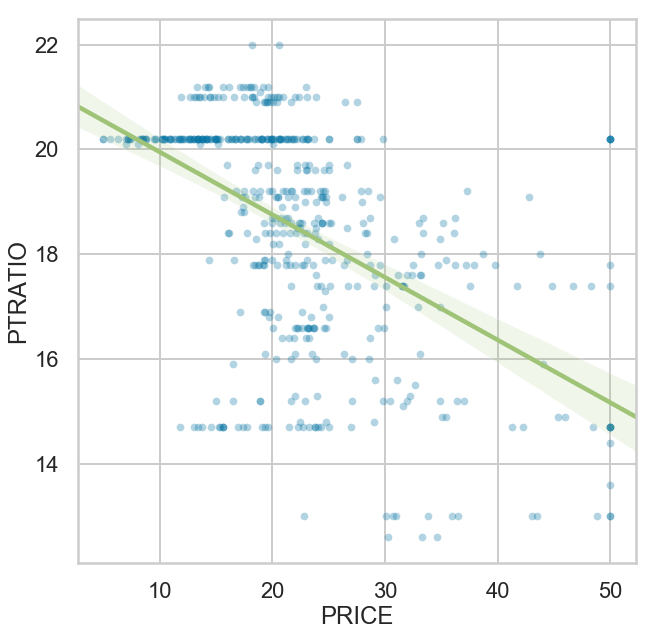

In [663]:
# your turn
plt.figure(figsize=(10,10))

sns.regplot(y=bos.PTRATIO, x=bos.PRICE, data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':60},line_kws={'color': 'C1'})


There is a strong negative correlation between the teacher-pupil ratio and house pricing, as the number of students per teacher increases, price decreases, indicating that areas with schools having more teacher to  student  ratio  have low prices.

In [664]:
m1 = ols('PRICE ~ PTRATIO', bos).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 04 May 2019   Prob (F-statistic):           1.61e-34
Time:                        00:08:59   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [665]:
print(m1.params)
print(m1.rsquared)
print(m1.fvalue)
print(m1.ssr)
#print(m1.f_statistics)
#print(str(m1.summary()))

Intercept    62.344627
PTRATIO      -2.157175
dtype: float64
0.257847318009223
175.1055428756955
31702.01320696725


# R-squared
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression .A statistical measure of how well the regression line approximates the real data points

R squared shows the amount of variance captured by the model. 
It is the percentage of the response variable variation that is explained by a linear model.

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.


In this case : R-squared = 0.258 means ,for unit increase in  pupil-teacher ratio there is an average decrease of approximately $2,157 ($1,000 x -2.1572) in the price.

# F-statistics 
A measure of how significant the fit is. 

The F-statistic measures whether there is a relationship between the response and the predictors.
If the F-statistic takes on a value close to 1, it indicates that the null hypothesis is true and that there is no relationship between the predictors and the response. 

If the F-statistic is greater than 1, it indicates that alternate hypothesis is true, and that there is a relationship between the predictors and the response.

In this case :F-statistic = 175 , and indicates that there is a relationship between the pupil-teacher ratio and the house prices.

# t statistics
The t statistic is the coefficient divided by its standard error. It can be thought of as a measure of the precision with which the regression coefficient is measured. The higher the t statistics value the more the significant the variable is.

The F-statisitc explian the significance on R squared value,a large F value indicates that there is a relationship. R2 then indicates how strong that relationship is.

A bigger R squared leads to high values of F, so if R squared is big (which means that a linear model fits the data well), then the corresponding F statistic should be large, which means that that there should be strong evidence that at least some of the coefficients are non-zero.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [666]:
# your turn
df1 = bos[['CRIM','RM','PTRATIO' ,'PRICE']]
X1 =  bos[['CRIM','RM','PTRATIO']]
y1 = bos['PRICE']

In [667]:
lm_2 = LinearRegression()
lm_2.fit(X1,y1)
print(lm_2.coef_)
print(lm_2.intercept_)

df1['PRICE_PREDICT']  = lm_2.predict(X1)
df1.head()

[-0.20496083  7.3804111  -1.0695461 ]
-3.370704335154187


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CRIM,RM,PTRATIO,PRICE,PRICE_PREDICT
0,0.00632,6.575,15.3,24.0,28.790148
1,0.02731,6.421,17.8,21.6,24.975397
2,0.02729,7.185,17.8,34.7,30.614036
3,0.03237,6.998,18.7,33.4,28.270266
4,0.06905,7.147,18.7,36.2,29.362429


In [668]:
print(np.sum((df1.PRICE - df1['PRICE_PREDICT']) ** 2))

17328.237120080244


In [669]:

m2 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 04 May 2019   Prob (F-statistic):           6.15e-98
Time:                        00:09:00   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic (244.2) > 1, means that there is a relationship between  the predictors and the price

The R squared value of 0.593 means that these three predictors variable are explaing about 59.3 % variation of the target variable ,and about 40 % of variation is unexplianed.

Looking at the coeffient values,   we can interpret them as :                              
1 . For every unit increase in the CRIM value the ,expected value of the price decreases by 2050$ ,keeping all other variables constant.      

2. For every unit increase in room(RM) value , the expected value of the price increases by 7380$ , which indicates a very strong positive  relation. i.e RM is very significant predictor in the model.    

3. Similarly  one unit increase in PTRATIO , the price decreases by 1070$, keeping other constant.    


The higher the t value the more the significant the variable is , from the summary table we can see that t value of RM is 18,  it means it is the most significant variable.

With p value for all being 0, indicates all of the variables are significant .

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [670]:
m3 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + LSTAT', bos).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sat, 04 May 2019   Prob (F-statistic):          1.10e-126
Time:                        00:09:00   Log-Likelihood:                -1539.2
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8945      4.080      5.611      0.000      14.879      30.910
CRIM          -0.0918      0.031     -2.998      0.003      -0.152      -0.032
RM             4.3326      0.422     10.266      0.000       3.503       5.162
PTRATIO       -0.9214      0.116     -7.914      0.000      -1.150      -0.693
DIS           -0.6201      0.128     -4.845      0.000      -0.872      -0.369
LSTAT         -0.6244      0.048    -12.911      0.000      -0.719      -0.529
==============================================================================
Omnibus:                      182.594   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.523
Skew:                           1.561   Prob(JB):                    9.93e-177
Kurtosis:                       8.357   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [671]:
df2 = bos[['CRIM','RM','PTRATIO' ,'DIS','LSTAT','PRICE' ]]
X2 =  bos[['CRIM','RM','PTRATIO','DIS','LSTAT']]
y2 = bos['PRICE']

In [672]:

lm_3 = LinearRegression()
lm_3.fit(X2,y2)

df2['PRICE_PREDICT']  = lm_3.predict(X2)
df2.head()


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,CRIM,RM,PTRATIO,DIS,LSTAT,PRICE,PRICE_PREDICT
0,0.00632,6.575,15.3,4.0900,4.98,24.0,31.637613
1,0.02731,6.421,17.8,4.9671,9.14,21.6,25.523618
2,0.02729,7.185,17.8,4.9671,4.03,34.7,32.024385
3,0.03237,6.998,18.7,6.0622,2.94,33.4,30.386007
4,0.06905,7.147,18.7,6.0622,5.33,36.2,29.535872


In [673]:
RSS_reduced = np.sum((df1.PRICE - df1['PRICE_PREDICT']) ** 2)
RSS_full = np.sum((df2.PRICE - df2['PRICE_PREDICT']) ** 2)
DF_reduced = len(bos.RM) - 3 -1
DF_full = len(bos.RM) -5 -1 

F = ((RSS_reduced - RSS_full) / (DF_reduced -  DF_full)) / (RSS_full / DF_full)
print( "𝐹 -test value comparing the two models : {}".format(round(F,4)))
print( " Diffrence in AIC values in the two models : {}".format(m3.aic - m2.aic))

𝐹 -test value comparing the two models : 83.3542
 Diffrence in AIC values in the two models : -141.59873385182163


Adding DIS and LSTAT to the regression model resulted in a more accurate model.
R squared value increases from 0.593 to 0.696 , that means the amount of target variance captured by the model increased.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [674]:
#m2.fittedvalues
#df1.PRICE
#df1.PRICE_PREDICT - df1.PRICE
#m2.resid  

#m2.fittedvalues - df1.PRICE

In [675]:
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, 
                                                    random_state=42)
lm_2 = LinearRegression()
lm_2.fit(X_train,y_train)


predict_train = lm_2.predict(X_train)
predict_test = lm_2.predict(X_test)

#len(predict_train), len(predict_test)

residual_train = predict_train - y_train
residual_test = predict_test - y_test

#len(X_train), len(y_train)


Text(0.5, 1.0, 'Residual Plot using training data(blue) and test data(green)')

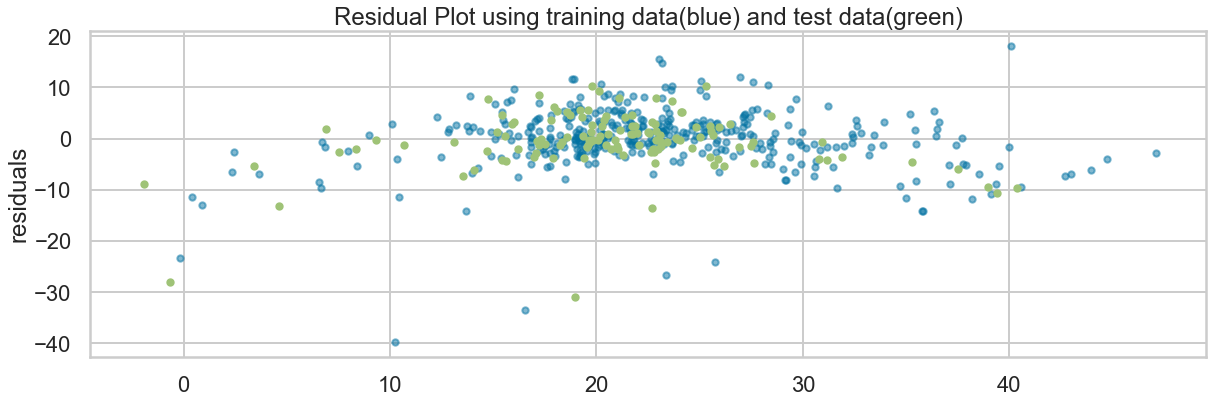

In [676]:
plt.figure(figsize=(20,6))
plt.scatter(predict_train , residual_train, c='b', s=40, alpha=0.5)
plt.scatter(predict_test , residual_test , c='g', s=40)
plt.ylabel("residuals")
plt.title("Residual Plot using training data(blue) and test data(green)")

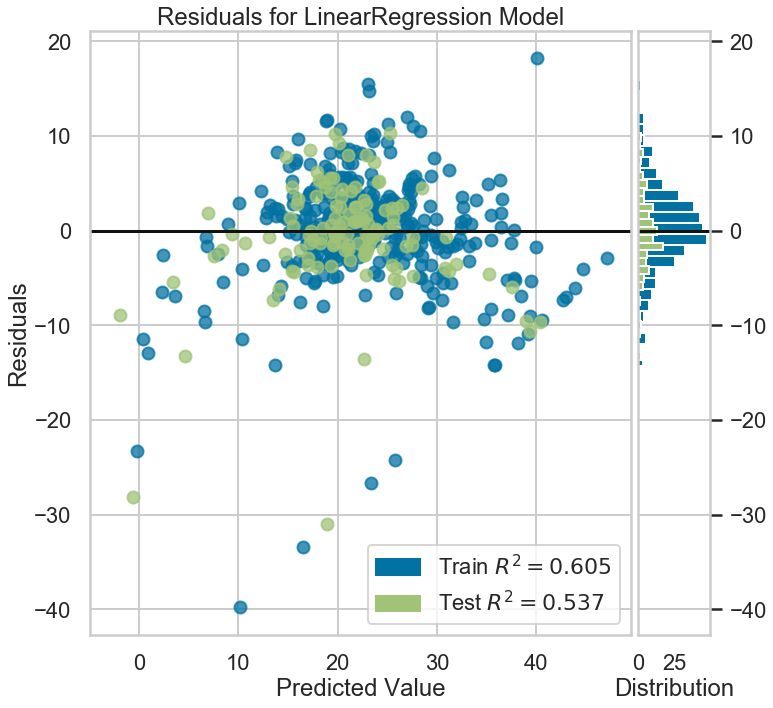

In [677]:

from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_2,size=(800,800))

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()                 # Draw/show/poof the data

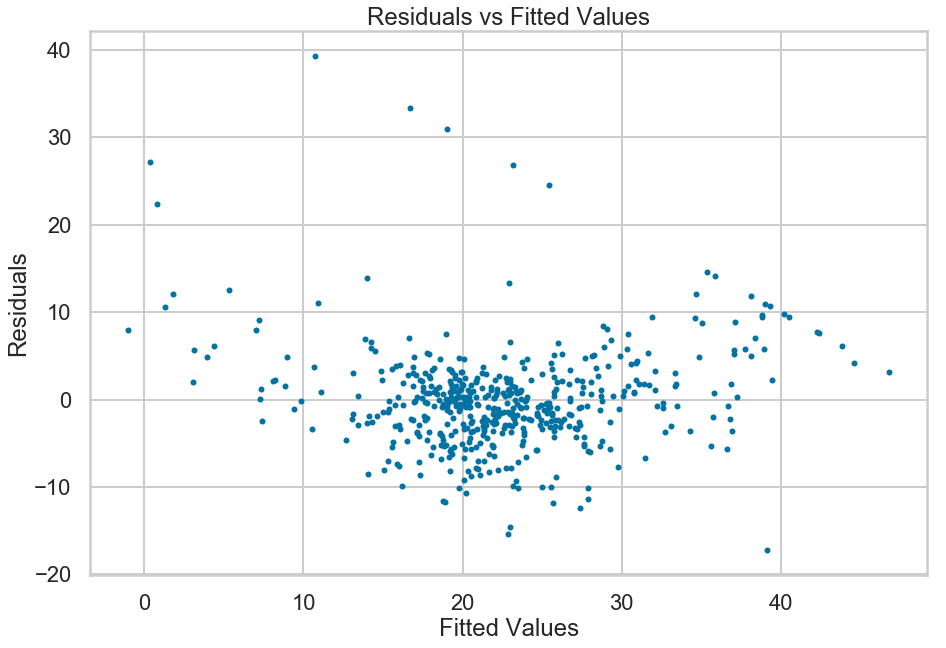

In [678]:
plt.figure(figsize=(15,10))

plt.plot(m2.fittedvalues, m2.resid, marker='.', linestyle='none')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Residuals vs Fitted Values')
plt.show()


A good residual vs fitted plot has three characteristics:

The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.

The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.(homoscedasticity)

No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers


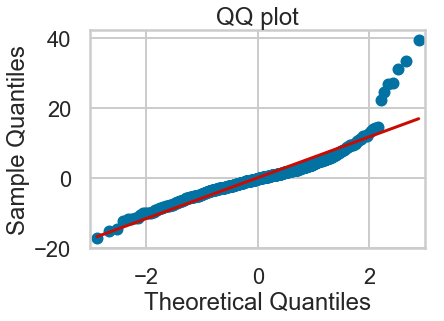

In [679]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot

#qqplot(residual_test, line='s')
#qqplot(residual_train, line='s')

qqplot(m2.resid ,line='s')

_ = plt.title("QQ plot")

(array([  7.,  43., 206., 197.,  38.,   8.,   1.,   3.,   2.,   1.]),
 array([-17.21238264, -11.56126082,  -5.91013899,  -0.25901717,
          5.39210465,  11.04322648,  16.6943483 ,  22.34547013,
         27.99659195,  33.64771377,  39.2988356 ]),
 <a list of 10 Patch objects>)

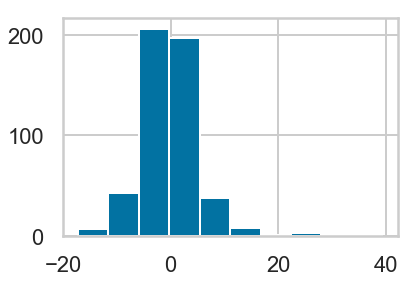

In [680]:
plt.hist(m2.resid)

Q-Q plot checks if residuals follow a normal distribution, which is an assumption of linear regression. 
The above QQ plot shows that the residuals are normally distributed ,with few outliers.

http://www.contrib.andrew.cmu.edu/~achoulde/94842/homework/regression_diagnostics.

http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html

The plot of residuals versus predicted values is useful for checking the assumption of linearity and homoscedasticity. If the model does not meet the linear model assumption, we would expect to see residuals that are very large (big positive value or big negative value). To assess the assumption of linearity we want to ensure that the residuals are not too far away from 0 . 


The normality assumption is evaluated based on the residuals and can be evaluated using a QQ-plot (plot 2) by comparing the residuals to "ideal" normal observations. Observations lie well along the 45-degree line in the QQ-plot, so we may assume that normality holds here

Fitted vs. residual shows how model perform on individual items while qq plot shows the performance of entire model.


# outliers

In [681]:
#df1['residuals']  = m2.resid

In [682]:
df1.head()

,CRIM,RM,PTRATIO,PRICE,PRICE_PREDICT
0,0.00632,6.575,15.3,24.0,28.790148
1,0.02731,6.421,17.8,21.6,24.975397
2,0.02729,7.185,17.8,34.7,30.614036
3,0.03237,6.998,18.7,33.4,28.270266
4,0.06905,7.147,18.7,36.2,29.362429


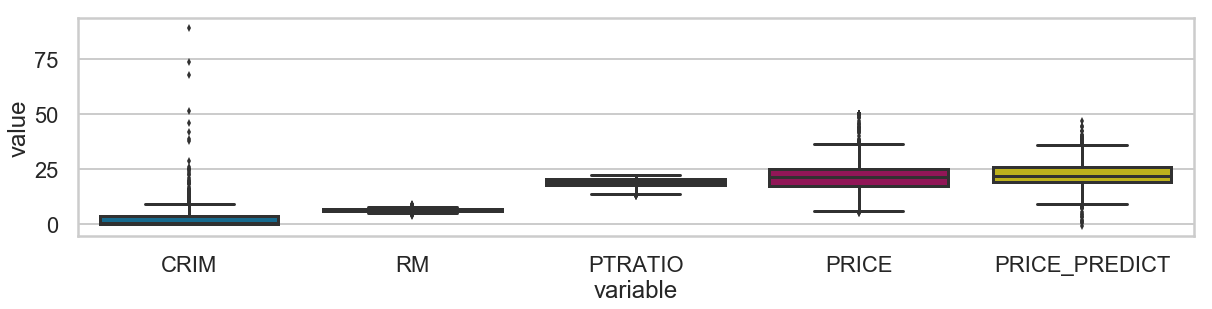

In [683]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( df1.iloc[:,:]))
plt.show()

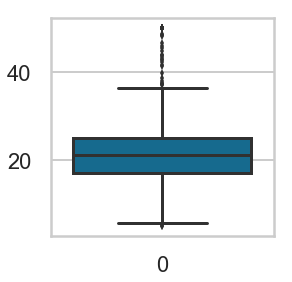

In [684]:
fig, ax = plt.subplots(figsize=(4, 4))
#sns.boxplot(data=np.log(data['n_tokens_title']))
sns.boxplot(data=df1['PRICE'])

plt.show()

 Box plot shows there are  outliers in PRICE and CRIM , This may be because the crime rate is very high in some places.


In [685]:
#plt.plot(df1.CRIM,df1.PRICE, marker='.', linestyle='none')

Outliers: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

Influence: An observation is said to be influential if removing the observation substantially changes the estimate of the coefficients. Influence can be thought of as the product of leverage and outlierness.

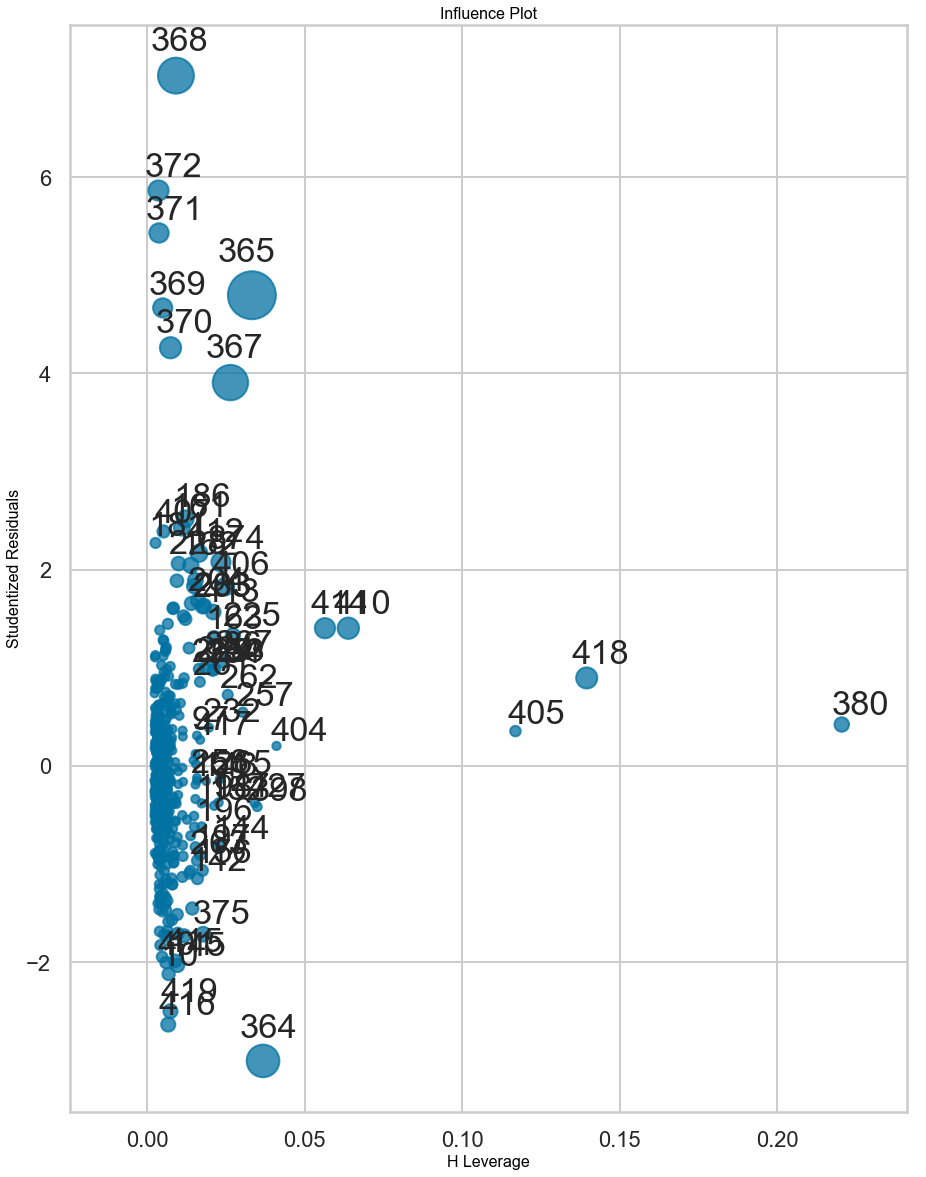

In [686]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(15,20))
fig = sm.graphics.influence_plot(m2, ax=ax, criterion="cooks")

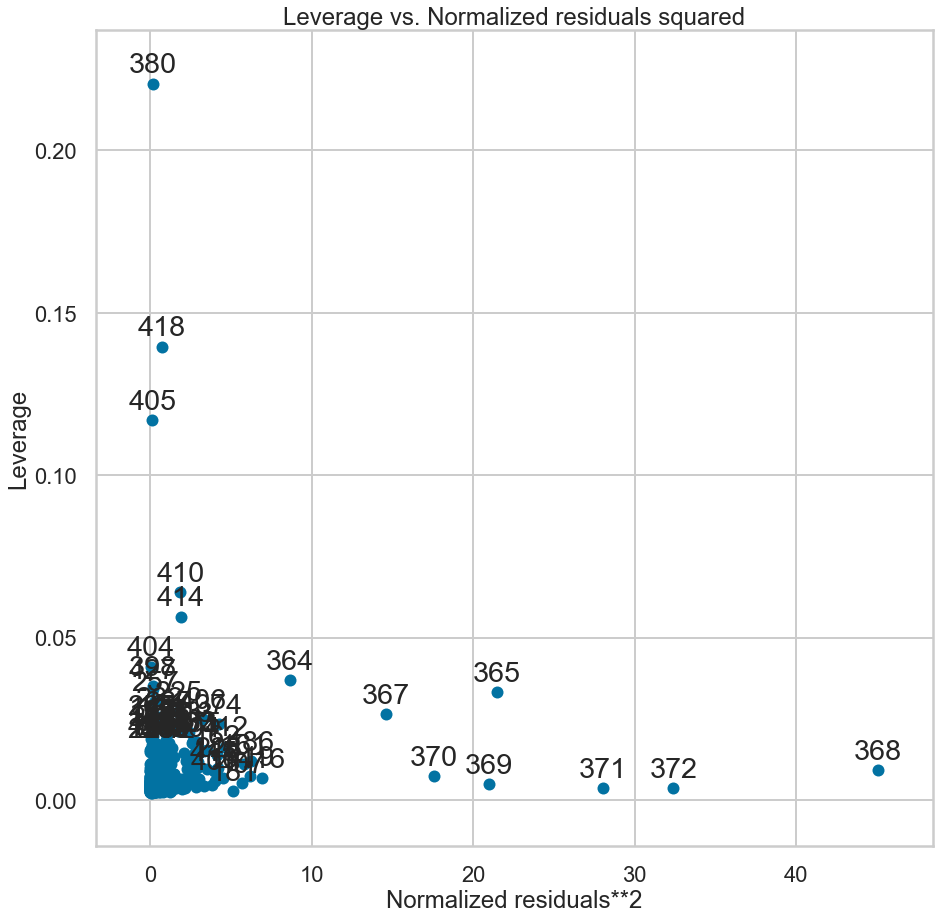

In [687]:
fig, ax = plt.subplots(figsize=(15,15))
fig = sm.graphics.plot_leverage_resid2(m2, ax=ax)

In [688]:
#High Leverage data points
df1.iloc[[380, 418, 405, 410, 414]]


,CRIM,RM,PTRATIO,PRICE,PRICE_PREDICT
380,88.9762,6.968,20.2,10.4,8.214533
418,73.5341,5.957,20.2,8.8,3.917963
405,67.9208,5.683,20.2,5.0,3.046237
410,51.1358,5.757,20.2,15.0,7.032655
414,45.7461,4.519,20.2,7.0,-0.999617


In [689]:
# Remove outliers and High Leverage points

df1_clean = df1.drop([380, 418, 405, 410, 414], axis=0)
df1_clean =df1_clean [df1_clean.PRICE < 50]

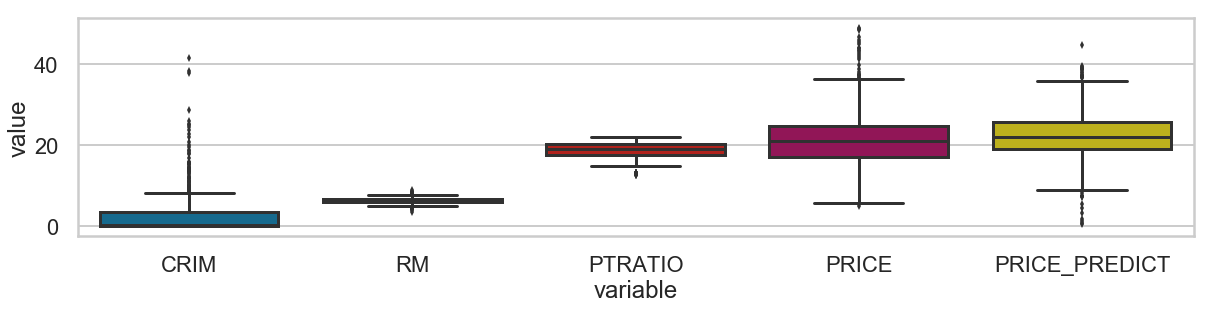

In [690]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt(df1_clean.iloc[:,:]))
plt.show()

In [691]:
X3 =  df1_clean[['CRIM','RM','PTRATIO']]
y3 = df1_clean['PRICE']

In [692]:
lm3 = LinearRegression()
lm3.fit(X3,y3)
print(lm3.coef_)
print(lm3.intercept_)

df1_clean['PRICE_PREDICT']  = lm3.predict(X3)
df1_clean.head()

[-0.34919726  6.44981023 -0.98716963]
0.7653886754385582


,CRIM,RM,PTRATIO,PRICE,PRICE_PREDICT
0,0.00632,6.575,15.3,24.0,28.066989
1,0.02731,6.421,17.8,21.6,24.598464
2,0.02729,7.185,17.8,34.7,29.526126
3,0.03237,6.998,18.7,33.4,27.429785
4,0.06905,7.147,18.7,36.2,28.377998


In [693]:
#print(np.sum((df1.PRICE - df1['PRICE_PREDICT']) ** 2))
m3 = ols('PRICE ~ CRIM + RM + PTRATIO', df1_clean).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     286.9
Date:                Sat, 04 May 2019   Prob (F-statistic):          9.87e-107
Time:                        00:09:13   Log-Likelihood:                -1434.9
No. Observations:                 485   AIC:                             2878.
Df Residuals:                     481   BIC:                             2895.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7654      3.292      0.232      0.816      -5.704       7.234
CRIM          -0.3492      0.039     -8.862      0.000      -0.427      -0.272
RM             6.4498      0.349     18.456      0.000       5.763       7.136
PTRATIO       -0.9872      0.110     -8.995      0.000      -1.203      -0.772
==============================================================================
Omnibus:                       76.232   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.119
Skew:                           0.747   Prob(JB):                     1.59e-48
Kurtosis:                       5.943   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [694]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(df1.PRICE,df1.PRICE_PREDICT))
print("Root Mean Squared Error before data cleaning: {}".format(rmse))

rmse1 = np.sqrt(mean_squared_error(df1_clean.PRICE,df1_clean.PRICE_PREDICT))
print("Root Mean Squared Error after data cleaning: {}".format(rmse1))

Root Mean Squared Error before data cleaning: 5.851967866051293
Root Mean Squared Error after data cleaning: 4.662905901004739


Removing outliers and high leverage point seems to help the model predictability. Also we can see improvement in f statistics from 245 to 286.AIC decreses from 3233 to 2878.
The root mean squared error decreased from 5.85 to 4.66

So we can conclude that model is performing better.